In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tqdm import tqdm

In [3]:
# df = pd.read_csv("../data/full_df_cleaned_v3.csv")
df = pd.read_csv("../dataset/image_data_one_hot.csv")
df.head(2)

,filepath,filename,normal,cataract,diabetic_retinopathy,glaucoma
0,normal\1034_left.jpg,1034_left.jpg,1,0,0,0
1,normal\1034_right.jpg,1034_right.jpg,1,0,0,0


In [4]:
df.columns

Index(['filepath', 'filename', 'normal', 'cataract', 'diabetic_retinopathy',
       'glaucoma'],
      dtype='object')

In [5]:
# y = np.array(df.drop(['Diagnostic', 'file', 'target_init', 'Target','tarstr',
#                         'filename','Patient Age', 'Patient Sex'],axis=1))
y = np.array(df.drop(['filepath','filename'],axis=1))
y.shape

(4217, 4)

In [6]:
# IMAGE_PATH = 'D:/College/6th_Semester/Mini_Project/data/preprocessed_images2/'
IMAGE_PATH = r'D:\minip\minip\dataset'

In [7]:
# df['filepath'] = IMAGE_PATH + df['filename']
import os

IMAGE_PATH = r'D:\minip\minip\dataset\train'
df['filepath'] = df['filepath'].apply(lambda x: os.path.join(IMAGE_PATH, x))


In [8]:
df.sample()

,filepath,filename,normal,cataract,diabetic_retinopathy,glaucoma
3472,D:\minip\minip\dataset\train\glaucoma\178_left...,178_left.jpg,0,0,0,1


In [9]:

train_image = []
for i in tqdm(range(df.shape[0])):
    img = image.load_img(df['filepath'][i],target_size=(224,224,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

100%|██████████| 4217/4217 [00:24<00:00, 174.15it/s]


In [10]:
X.shape


(4217, 224, 224, 3)

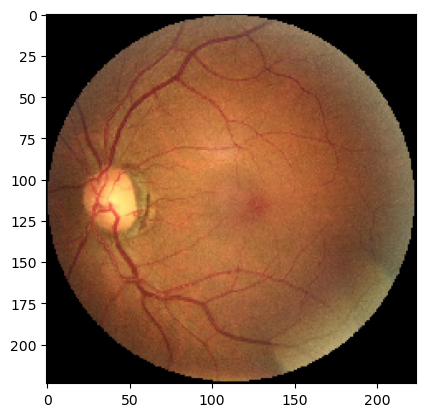

In [11]:
plt.imshow(X[2])


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

In [15]:
def initialize_model():
    model = Sequential()
    model.add(Conv2D(filters=16, kernel_size=(2, 2), activation="relu", input_shape=(256,256,3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', 
        optimizer='adam',
        metrics=['accuracy'])

    return model

In [16]:
model = initialize_model()
model.summary()

c:\Users\janvi\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 255, 255, 16)   │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 58, 58, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 29, 29, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 29, 29, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 25, 25, 64)     │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,346,868 (5.14 MB)

 Trainable params: 1,346,868 (5.14 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:

model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), batch_size=64)

Epoch 1/30


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense" is incompatible with the layer: expected axis -1 of input shape to have value 9216, but received input with shape (None, 6400)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 224, 224, 3), dtype=float32)
  • training=True
  • mask=None

In [18]:
model.evaluate(X_test, y_test, verbose=1)

ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense" is incompatible with the layer: expected axis -1 of input shape to have value 9216, but received input with shape (None, 6400)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 224, 224, 3), dtype=float32)
  • training=False
  • mask=None

In [40]:
model.save("multilabel_final.h5")

In [25]:
y_pred = model.predict(X_train)

119/119 ━━━━━━━━━━━━━━━━━━━━ 181s 1s/step


In [57]:
df.sample(2)

,filepath,filename,normal,cataract,diabetic_retinopathy,glaucoma
1280,D:\College\6th_Semester\Mini_Project\data\Data...,2212_right.jpg,0,1,0,0
861,D:\College\6th_Semester\Mini_Project\data\Data...,3242_left.jpg,1,0,0,0


In [60]:
y_pred[1280]

array([0.6117907 , 0.15133393, 0.00448254, 0.29453534], dtype=float32)

In [21]:
from tensorflow.keras.models import load_model
model = load_model('ocular_disease_vgg16_2.h5')

In [ ]:
y_pred = model.predict(X_train)

In [1]:
#Confusion Matrix
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score

# Generate the confusion matrix
# Convert predictions to class labels
predicted_labels = np.argmax(y_pred, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate loss
loss = model.evaluate(X_test, y_test, verbose=0)[0]
print("Loss:", loss)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

NameError: name 'y_pred' is not defined